<a href="https://colab.research.google.com/github/yogithahegde/Full-stack-data-science-projects/blob/main/Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT A DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#SPLIT THE DATASET
#USE EVERY TECHNIQUE MENTIONED BELOW
#BEST IF THE DATA IS ALREADY CLEANED

In [ ]:
#DATASETS WITH NAMES
"""
iris = datasets.load_iris()
X_iris = iris.data[:, :4] 
Y_iris = iris.target 
"""
wine = pd.read_csv('/content/wine.csv')




In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values but a lot of zeros
* this is left as it is intentionally

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
#split to x and y then scale the x values
x = wine.iloc[: , :-1]
y = wine.iloc[: ,-1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xscaled= scaler.fit_transform(x)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [ ]:
print(xscaled)
print(y)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
[0 0 0 ... 1 0 1]


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xscaled,y,test_size =0.2,random_state = 42)

How does acidity affect the taste of wine?
* A wine that has high acidity will usually taste crisper and more tart on the palate. A low acid wine will feel softer and rounder on the palate. A great way to detect the acidity of a wine is by assessing how much it makes your mouth water.
* Citric	0.04 to 0.7
* pH values range from 2.9 to 4.2

#ENSEMBLE TECHNIQUES

In [ ]:
#Max voting 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier()
model_soft= VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='soft')
model_hard= VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model_soft.fit(x_train,y_train)
ypredsoft = model_soft.predict(x_test)
print('max voting score with soft voting :', model_soft.score(x_test,y_test))
model_hard.fit(x_train,y_train)
ypredhard = model_hard.predict(x_test)
print('max voting score with hard voting :', model_hard.score(x_test,y_test))

# WEIGHTED AVERAGE 
wtavg = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='soft',weights = [0.5,0.3])
wtavg.fit(x_train,y_train)
print('weighted average result: ',wtavg.score(x_test,y_test))

max voting score with soft voting : 0.73125
max voting score with hard voting : 0.725
weighted average result:  0.728125


* Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.
* Max voting is used in classification problems: soft or hard voting

STACKING

In [ ]:
#stacking
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)

lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,xscaled,y,cv = 5,scoring = 'accuracy')
print("The final accuracy score is: ",score.mean())

The final accuracy score is:  0.7373569749216301


BLENDING

In [ ]:
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

* Bagging to decrease the model’s variance;
* Boosting to decreasing the model’s bias, and;
* Stacking to increasing the predictive force of the classifier.

BAGGING WITH BOOTSTRAPPING





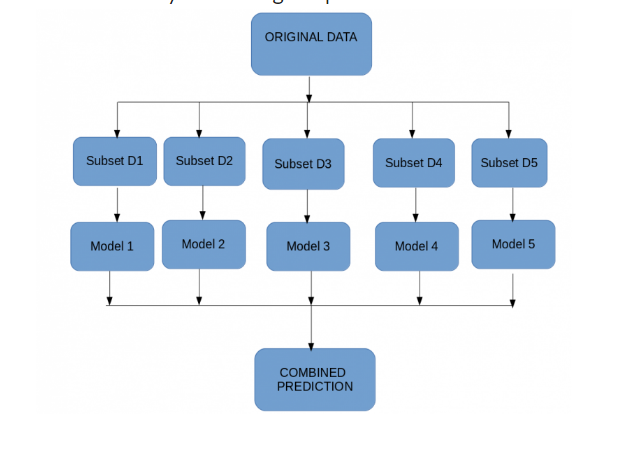

BAGGING META ESTIMATOR

In [ ]:
#wine dataset
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

"""
#REGRESSOR
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)
"""


0.778125

ADABOOST

In [ ]:
#ADABOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

"""
#ADABOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)
"""


0.74375

GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

XGBOOST

In [ ]:
#XGBOOST CLASSIFIER
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

"""
#XGBOOST REGRESSOR
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)
"""

0.70625

CATBOOST

In [ ]:
"""#CATBOOST
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

#CATBOOST REGRESSOR
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

LIGHT GBM

In [ ]:
"""#LIGHT GBM
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
   if y_pred[i]>=0.5: 
   y_pred[i]=1
else: 
   y_pred[i]=0


# REGRESSOR
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5